In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('sales_data.csv',encoding = 'cp1252')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
#Puuttuvat arvot sarakkeissa
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
#Korvataan alueiden puuttuvat arvot
df['ALUE']=df['TERRITORY'].fillna('Ei tiedossa')

Text(0.5, 0, 'Deal size')

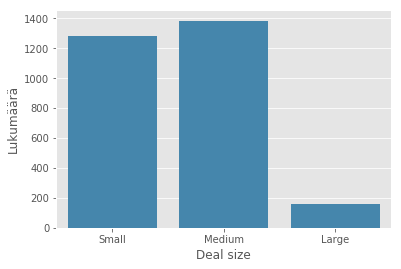

In [5]:
#Tilausten lukumäärät koon mukaan
plt.style.use('ggplot')
ax1= sns.countplot(x='DEALSIZE',data=df, color='C1')
ax1.set_ylabel('Lukumäärä')
ax1.set_xlabel('Deal size')

Text(0.5, 0, 'Deal size')

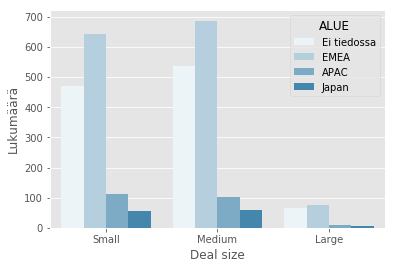

In [6]:
#Tilausten lukumäärät koon mukaan alueittain
ax2= sns.countplot(x='DEALSIZE',hue='ALUE',data=df, color='C1')
ax2.set_ylabel('Lukumäärä')
ax2.set_xlabel('Deal size')

C:\Users\JoelM\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


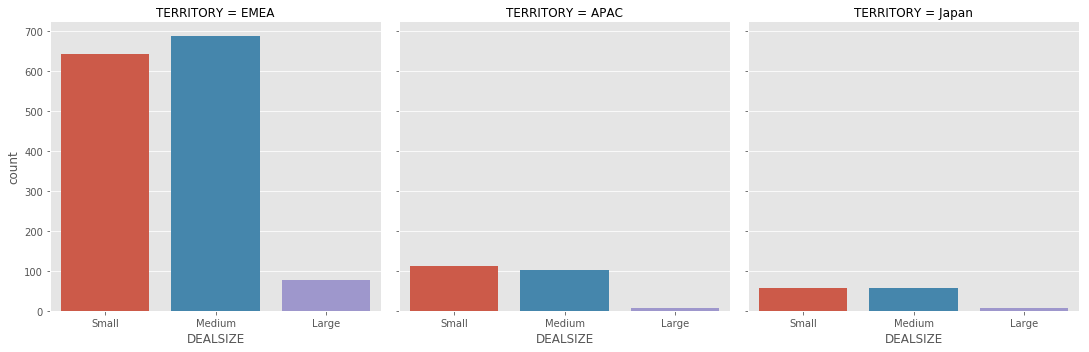

In [7]:
#Verrataan alueiden tilausten kokoja rinnakkain
sns.factorplot(x='DEALSIZE',col='TERRITORY',data=df,kind='count')

In [8]:
#Otetaan uuteen dataframeen vain myynnit alueittain
df2=df[['SALES','TERRITORY']]
df2['TERRITORY'].fillna('Ei tiedossa', inplace=True)
df2.head()

C:\Users\JoelM\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SALES,TERRITORY
0,2871.00,Ei tiedossa
1,2765.90,EMEA
2,3884.34,EMEA
3,3746.70,Ei tiedossa
4,5205.27,Ei tiedossa


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6')]

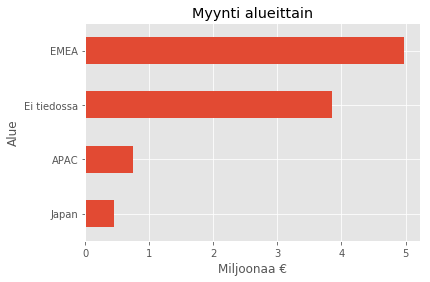

In [9]:
#Katsotaan tilausten summia alueittain matplotlibillä
plt.style.use('ggplot')
#Summataan myynnit erilliseen dataframeen alueittain
df3=df2.groupby('TERRITORY').sum()
#Luodaan uusi axes olio muotoilua varten
ax3=df3.sort_values(by='SALES').plot.barh(title='Myynti alueittain', legend=False)
#Otsikot
ax3.set(xlabel='Miljoonaa €',ylabel='Alue')
#Arvojen muotoilu
ax3.set_xticklabels(['{:.0f}'.format(x/1000000) for x in ax3.get_xticks()])

[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %')]

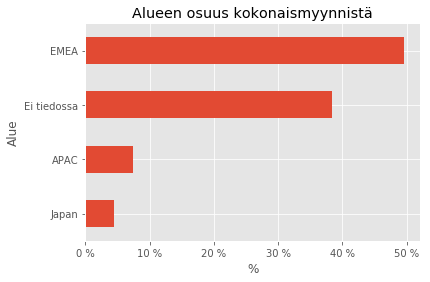

In [10]:
#Alueen myyntien osuus kokonaismyynnistä

#Lisätään sarake prosentteja varten
summa=df['SALES'].sum()
df3['%'] = df3['SALES'] / summa * 100

#Tehdään kuvio
ax4=df3.sort_values(by='%')['%'].plot.barh(title='Alueen osuus kokonaismyynnistä', legend=False, color='C0')
ax4.set(xlabel='%', ylabel='Alue')
ax4.set_xticklabels(['{:.0f} %'.format(x) for x in ax4.get_xticks()])